# Lab 03.a - Week 4
# Time Series Processing
### Signal Processing

Signal processing is extremely important to process and acquire useful information from the time-series data. Methods such as Fast Fourier Transform (FFT) and wavelet transforms offer the potential to decompose, filter, and extract features and thus are extremely valuable tools for analyzing complex signals.

In this experiment, we will explore some of the signal processing techniques and how they are applied to the analysis of real data. We will apply the techniques to a particular electrocardiogram (ECG) data set to see how they perform at processing physiological signals. By experimenting with frequency-domain transforms, time-frequency analysis, and noise reduction techniques, we will contrast the strengths and weaknesses of different approaches to signal processing.



PyWavelets is a strong python package when working with wavelets, it will need to be installed in your environment. This can be done using pip. Itt is also a good habit to keep all installs and imports in the same place

In [1]:
!pip install PyWavelets -q

In [2]:
import pywt
import pywt.data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft

plt.style.use('seaborn-v0_8')


We will be using the ecg dataset that is available to load directly from PyWavelets, below is some basic code cells to explore aspects of this data

In [3]:
ECG_signal = pywt.data.ecg()
ECG_signal.shape

(1024,)

In [4]:
pd.DataFrame(ECG_signal).head()

,0
0,-86
1,-87
2,-87
3,-89
4,-89


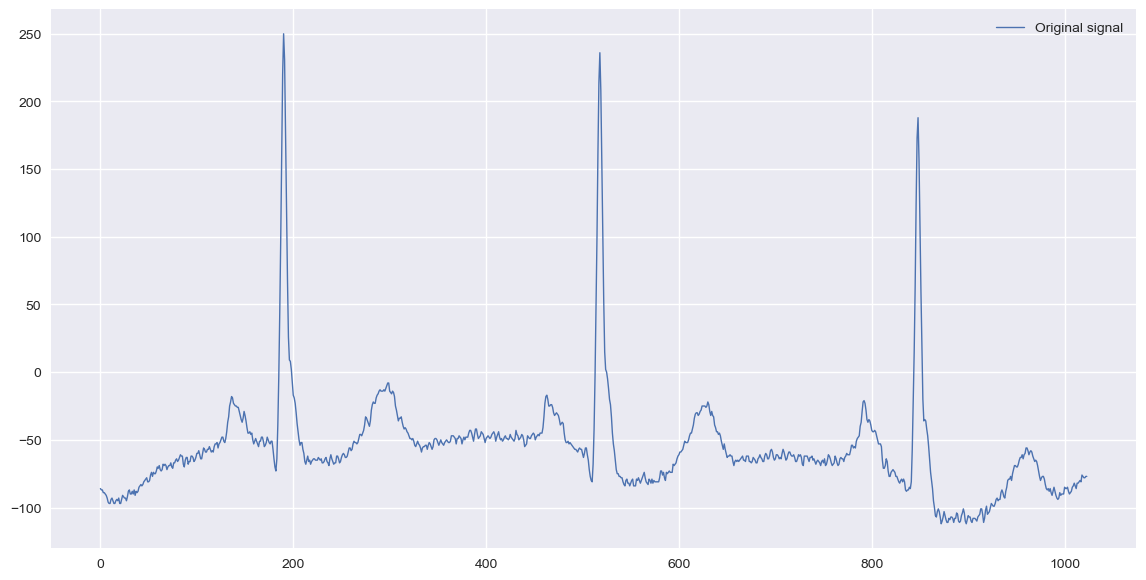

In [5]:
plt.figure(figsize=(14,7))
plt.plot(ECG_signal, linewidth=1.0)
plt.legend(['Original signal'])
plt.show()

## Autocorrelation of Time Series

The autocorrelation of a time series can inform us about repeated patterns or serial correlation. The latter refers to the correlation between the signal at a given time and at a later time. Autocorrelation analysis can thus provide insights into the timescale of fluctuations.

Here we will be running Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).
Both ACF and PACF are fundamental tools in time series analysis, helping to understand the correlation between observations at different time lags.

In [6]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ECG_signal, nlags=340)
lag_pacf = pacf(ECG_signal, nlags=340, method='ols')

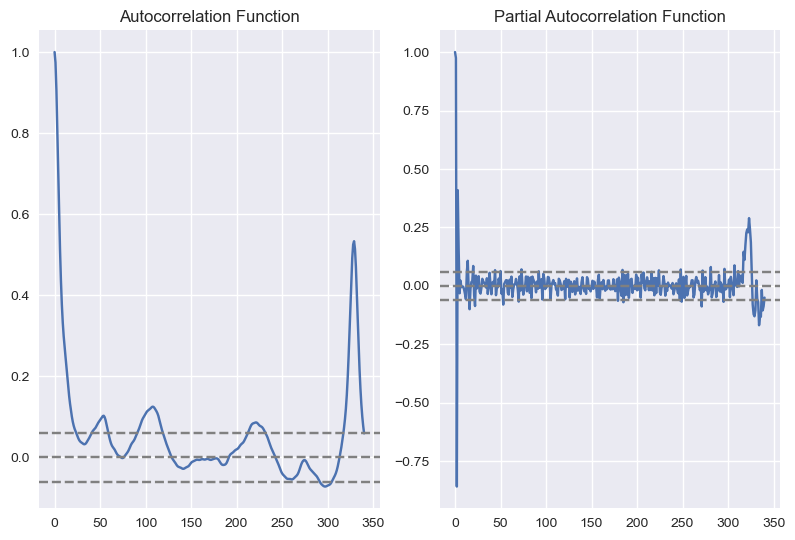

In [7]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ECG_signal)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ECG_signal)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ECG_signal)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ECG_signal)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Autocorrelation quantifies the average similarity between a signal and a shifted version of the same signal as a function of the lag between them. In other words, autocorrelation can provide information about repeated patterns as well as the timescale of fluctuations in the signal. The faster the autocorrelation decays to zero, the faster the signal varies.

Autocorrelation Function (ACF):

- The ACF measures the correlation between the signal and a lagged version of itself. For example, at lag 10, the ACF compares the series at time points t1 to t2 with the series at t1-10 to t2-10 (where t1-10 and t2-10 are the endpoints).

Partial Autocorrelation Function (PACF):

- The PACF measures the correlation between the signal and a lagged version of itself after removing the variations already explained by the intervening lags. For instance, at lag 10, the PACF examines the correlation while accounting for the effects already explained by lags 1 through 9.

Plotting and Confidence Intervals:

- In ACF and PACF plots, the two dotted lines on either side of 0 represent the confidence intervals. If a value falls outside these intervals, it is considered statistically significant.


## Decomposition

Signal decomposition is the process of separating a complex signal into simpler elements to analyze its internal structure. It can involve breaking down a signal into multiple frequency bands (Fourier or wavelet decomposition, for instance), trend and noise separation (empirical mode decomposition, for instance), or feature extraction for further processing. Decomposing a signal makes it easier to study its features, eliminate unwanted parts, and enhance analysis in many fields including biomedical signal processing, audio processing, and time-series forecasting.

Time series can be decomposed into both trend, seasonality and noise (or residuals). These are modeled separately, and the remaining part of the series is returned. Here, seasonal decomposition decomposes the signal into trend, seasonality and the remianing residuals (noise) using additive model.

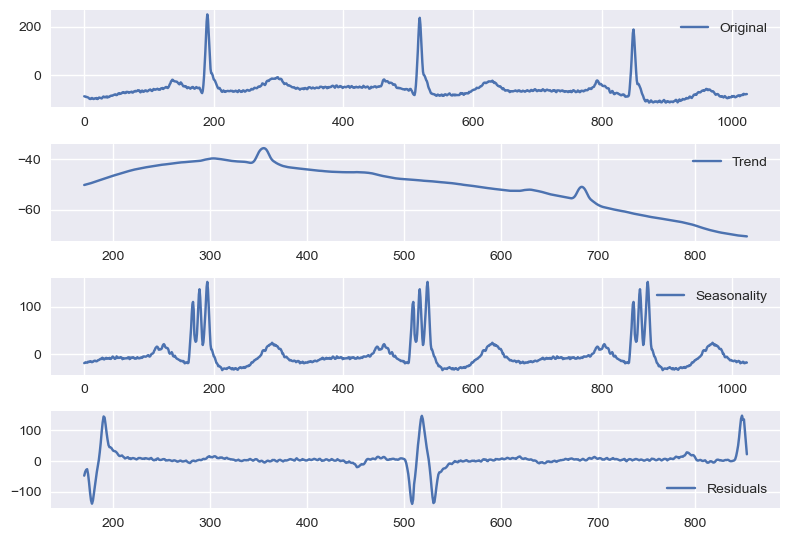

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(ECG_signal, period=340)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ECG_signal, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Working with Moving Averages


Moving averages are useful and yet simple tools in time series analysis for smoothing out short-run fluctuations and unveiling long-run trends in time series data. It entails taking a constant number of successive observations and revising its average when new observations become accessible. Examples include simple moving average (SMA), in which an equal weight is assigned to all observations in a window, and exponential moving average (EMA), in which a larger weight is assigned to newer observations. There are many applications of moving averages in signal processing for filtering out noise, discovering trends, and improving information interpretation.

---



### Simple Moving Average
![](https://www.alpharithms.com/wp-content/uploads/1265/simple-moving-average-formula-alpharithms.jpg)

### Exponential Moving Average
![image.png](https://www.alpharithms.com/wp-content/uploads/1265/exponential-moving-average-formula-alpharithms.jpg)




Here we calculate a 10 and 50 point simple moving average. See how the data differs, try adding another window size and see what that looks like with this data

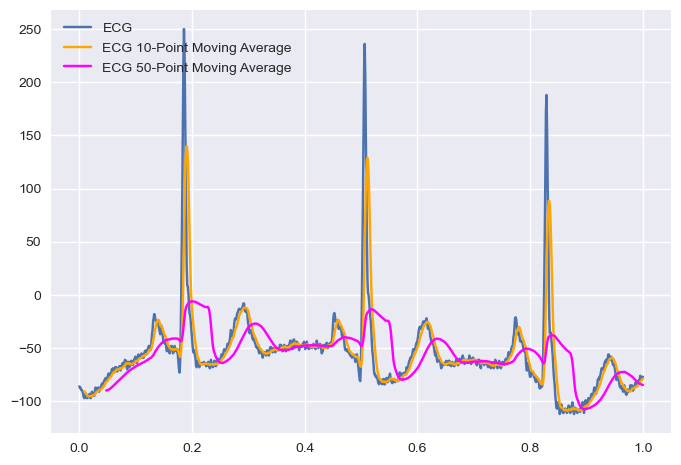

In [9]:
time = np.linspace(0, 1, num=ECG_signal.shape[0])
df = pd.DataFrame(data=ECG_signal.transpose(), columns=["ecg"])
average_mean_10 = df.ecg.rolling(window=10).mean()
average_mean_50 = df.ecg.rolling(window=50).mean()
plt.plot(time, df.ecg, label='ECG')
plt.plot(time, average_mean_10, label='ECG 10-Point Moving Average', color='orange')
plt.plot(time, average_mean_50, label='ECG 50-Point Moving Average', color='magenta')
plt.legend(loc='upper left')
plt.show()

In a similar way we are visualising a 10 and 50 point exponential moving window.

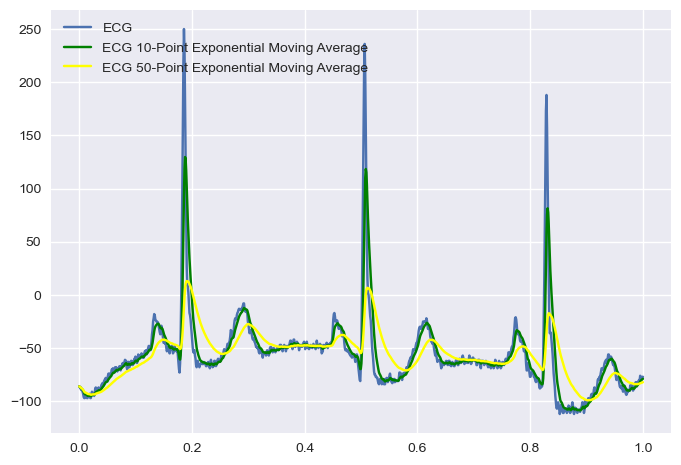

In [10]:
exp_average_mean_10 = df.ecg.ewm(span=10).mean()
exp_average_mean_50 = df.ecg.ewm(span=50).mean()
plt.plot(time, df.ecg, label='ECG')
plt.plot(time, exp_average_mean_10, label='ECG 10-Point Exponential Moving Average', color='green')
plt.plot(time, exp_average_mean_50, label='ECG 50-Point Exponential Moving Average', color='yellow')
plt.legend(loc='upper left')
plt.show()

Here we are plotting the simple and exponential moving averages. This allows us to directly compare them and assess what may be better suited to our task.

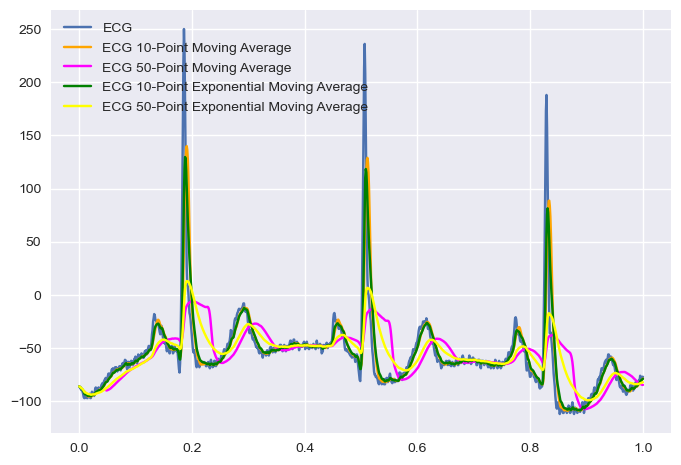

In [11]:
plt.plot(time, df.ecg, label='ECG')
plt.plot(time, average_mean_10, label='ECG 10-Point Moving Average', color='orange')
plt.plot(time, average_mean_50, label='ECG 50-Point Moving Average', color='magenta')
plt.plot(time, exp_average_mean_10, label='ECG 10-Point Exponential Moving Average', color='green')
plt.plot(time, exp_average_mean_50, label='ECG 50-Point Exponential Moving Average', color='yellow')
plt.legend(loc='upper left')
plt.show()

## Working with Fourier Transforms

The Fourier Transform is an important mathematics tool for decomposing a signal into its constituent parts in terms of frequency. It converts a time-domain signal into a frequency domain, and in the process, it discloses constituent sinusoidal frequencies of the original signal. It is most useful for finding periodicity, filtering out noise, and investigating behavior in such fields as audio analysis, medical diagnostics, and signal processing. Fast Fourier Transform (FFT) is a computationally efficient algorithm for speeding computation, and in many cases, real-time use is feasible. With use of the Fourier Transform, analysis and manipulation of many types of signals become easier.

![image.png](https://stemporiumdotblog.files.wordpress.com/2023/04/3311485_orig.gif)

![image.png](https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif)

This code generates two composite signals via summation of waves with different frequencies, and then employs Fast Fourier Transform (FFT) for analysis of their individual frequency contents. It generates one plot for the time-domain signal and a second for its corresponding frequency plot, representing a composition of a signal in terms of different frequency contents.

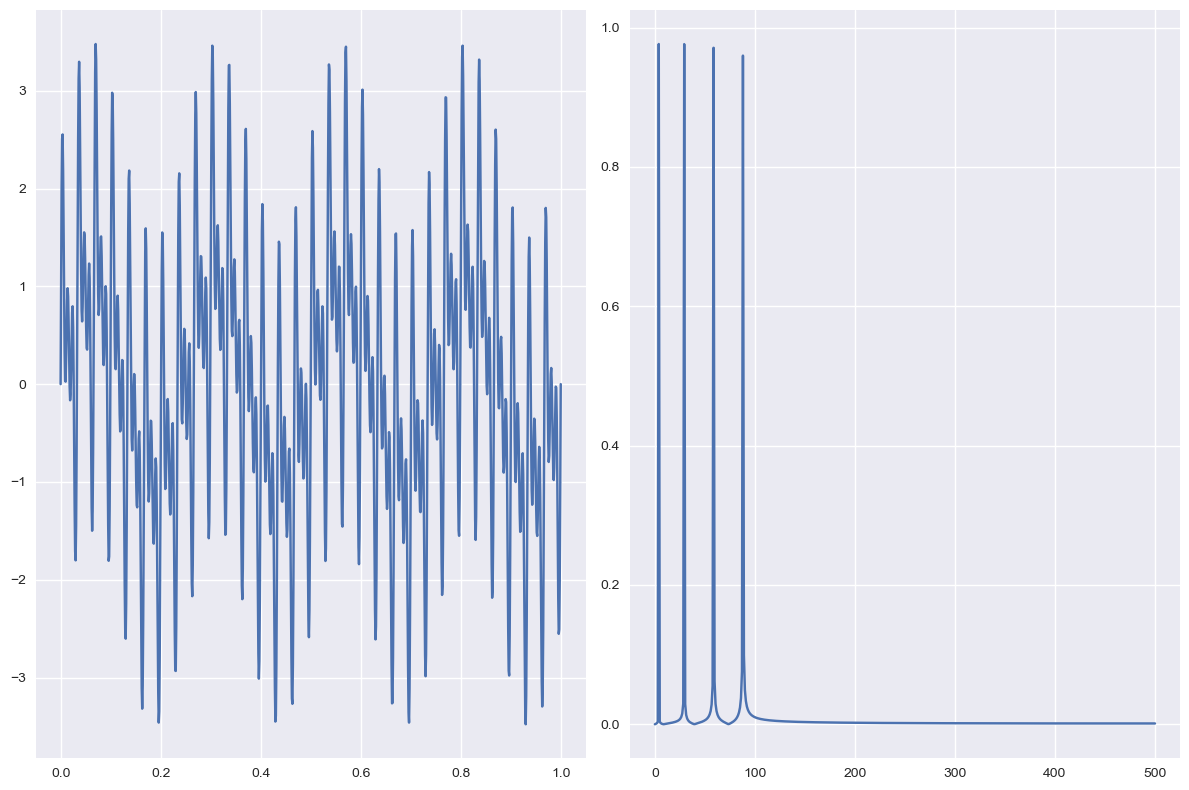

In [12]:
def get_fft_values(y_values, T, N, f_s): #
    N2 = 2 ** (int(np.log2(N)) + 1) # Rounds up to the nearest power of 2
    f_values = np.linspace(0.0, 1.0/(2.0*T), N2//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N2 * np.abs(fft_values_[0:N2//2])
    return f_values, fft_values

t_n = 1
N = 1000
T = t_n / N
f_s = 1/T

xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, int(t_n/4), num=int(N/4))

frequencies = [4, 30, 60, 90]

y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)


fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
axarr[0].plot(xa, composite_signal1)
axarr[1].plot(f_values1, fft_values1)

plt.tight_layout()
plt.show()

In [13]:
average_mean_10[10:]

10     -91.6
11     -92.3
12     -92.9
13     -93.5
14     -94.3
        ... 
1019   -81.1
1020   -80.7
1021   -80.1
1022   -79.2
1023   -78.7
Name: ecg, Length: 1014, dtype: float64

Here we are generating the composite signals on mean data

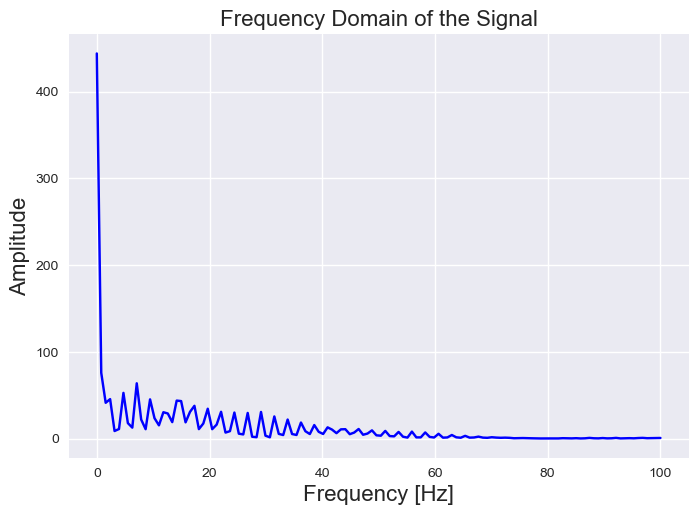

In [14]:
from scipy.fftpack import fft

t_n = 1
N = 200
T = t_n / N
f_s = 1/T

f_values, fft_values = get_fft_values(average_mean_10[10:].values, T, N, f_s)

plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency Domain of the Signal", fontsize=16)
plt.show()

## Working with wavelets

Wavelet is a mathematical function that allows data or signal analysis in both the time and frequency domains. Wavelets are distinct from the traditional Fourier transforms in that they use finite-duration sinusoids rather than infinite-duration sinusoids, and are scalable and shiftable, hence allowing them to be useful in capturing localized features in signals. This ability makes wavelets applicable in image compression tasks, signal denoising, and feature extraction because they are able to unveil transient and non-stationary behavior and provide multi-resolution representation at different scales.

Discrete wavelets and continuous wavelets are two wavelet analysis techniques that differ primarily in the manner in which they represent signals. Discrete wavelet transforms (DWT) are used on fixed, discrete positions and scales and produce a collection of wavelet coefficients, which can be calculated efficiently and used for applications like compression and denoising. The technique is effective in extracting local features at different resolutions but may cause artifacts due to the inherent sampling. Conversely, continuous wavelet transforms (CWT) examine signals over a continuous scale and position range and yield a more accurate, smoother representation of the frequency composition of a signal. CWT is easy to use for looking at complex patterns but is computationally heavier and generates more data. Overall, DWT is suitable for situations where efficiency is required, and CWT is best used for in-depth inspection of signal characteristics.

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/54cd64e5a55de784c1611937070217e1545b6964)

![](http://ataspinar.com/assets/img/posts/2018-12-21-a-guide-for-using-the-wavelet-transform-in-machine-learning/Comparisonoftransformations.jpg)




Here we load dmey wavelet familiy to decompose our ecg signal at level 1, the data is displayed in both a table and plotted below. Notice that when we decompose the signal we get 2 coefficients, the detail and the approximation

In [15]:
w = pywt.Wavelet('dmey')
coeffs = pywt.wavedec(ECG_signal, w, level=1)

In [16]:
np.array(coeffs).shape

(2, 542)

In [17]:
pd.DataFrame(coeffs).head()

,0,1,2,3,4,5,6,7,8,9,...,532,533,534,535,536,537,538,539,540,541
0,-124.965961,-133.345376,-130.934731,-129.774244,-136.460155,-133.943716,-133.083234,-137.001662,-134.272764,-133.048883,...,-117.78580,-119.057548,-117.533251,-124.319902,-126.420683,-121.728173,-120.787397,-125.371080,-128.051392,-127.699694
1,0.701737,-2.176550,1.206131,-0.545098,0.758325,1.907039,-0.966954,0.366927,-0.675128,0.798803,...,1.94478,-1.561268,-0.295362,-0.933845,0.207370,1.046583,-2.441113,-0.505044,1.373369,1.204653


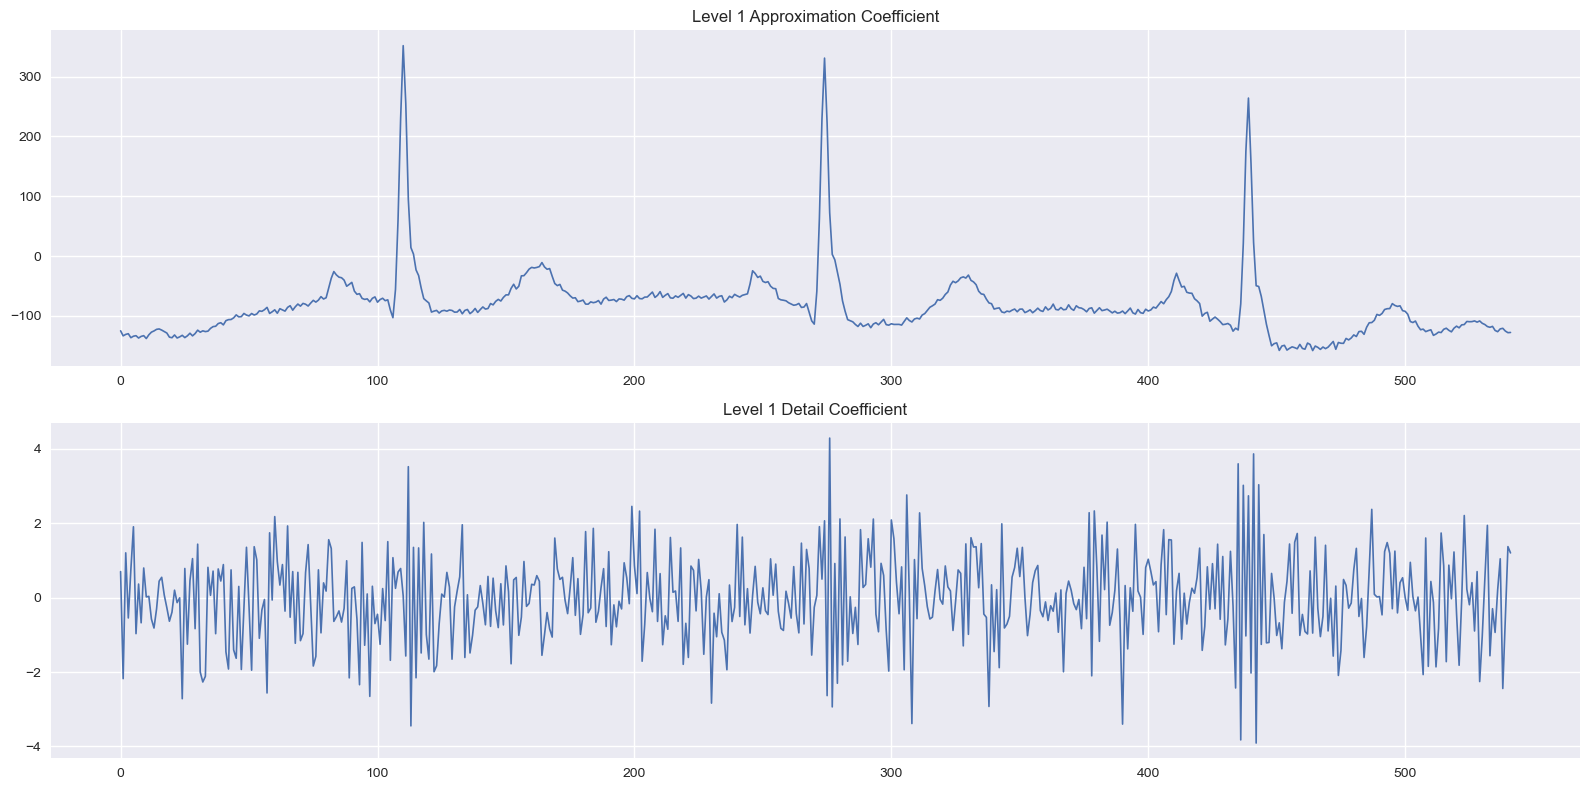

In [18]:
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
axarr[0].plot(coeffs[0], linewidth=1.2)
axarr[0].set_title('Level 1 Approximation Coefficient')
axarr[1].plot(coeffs[1], linewidth=1.2)
axarr[1].set_title('Level 1 Detail Coefficient')
plt.tight_layout()
plt.show()

Now lets see what level 3 decomposition looks like

In [19]:
coeffs = pywt.wavedec(ECG_signal, w, level=3)


In [20]:
pd.DataFrame(coeffs).head()

,0,1,2,3,4,5,6,7,8,9,...,532,533,534,535,536,537,538,539,540,541
0,-260.477768,-269.143958,-269.700239,-247.319377,-256.405033,-271.473320,-266.660439,-257.092481,-264.163758,-271.008237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.382609,-3.661353,1.756194,-1.329571,3.445197,-0.459702,2.859282,0.221278,0.622007,-0.293024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.233756,0.602701,-3.681526,3.350703,1.262519,-2.473933,0.628148,-0.230293,-1.377271,3.773478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.701737,-2.176550,1.206131,-0.545098,0.758325,1.907039,-0.966954,0.366927,-0.675128,0.798803,...,1.94478,-1.561268,-0.295362,-0.933845,0.20737,1.046583,-2.441113,-0.505044,1.373369,1.204653


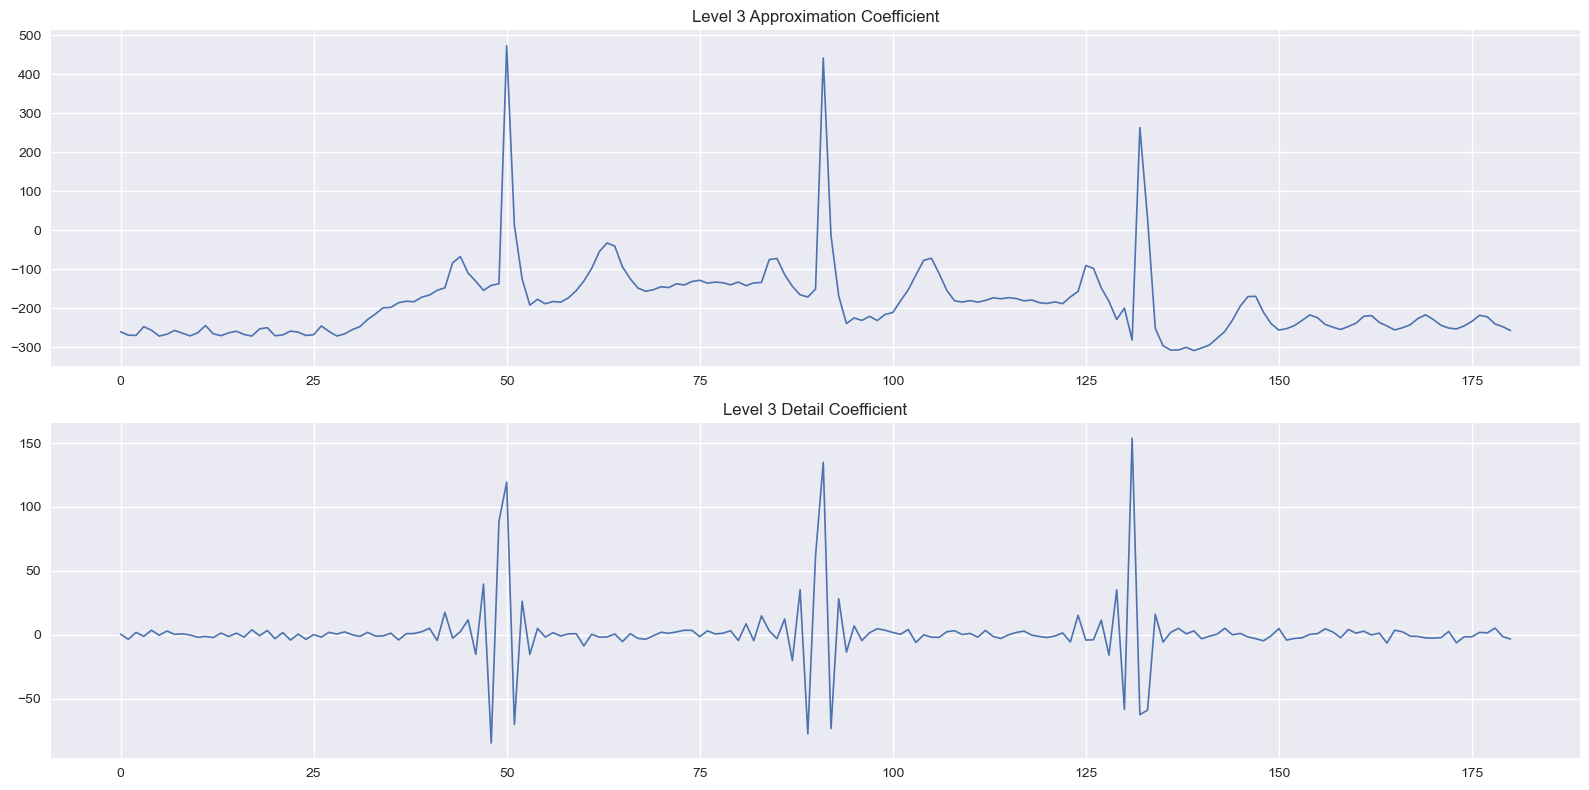

In [21]:
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
axarr[0].plot(coeffs[0], linewidth=1.2)
axarr[0].set_title('Level 3 Approximation Coefficient')
axarr[1].plot(coeffs[1], linewidth=1.2)
axarr[1].set_title('Level 3 Detail Coefficient')
plt.tight_layout()
plt.show()

And now lets also decompsoe the signal at level 5

/opt/anaconda3/lib/python3.11/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


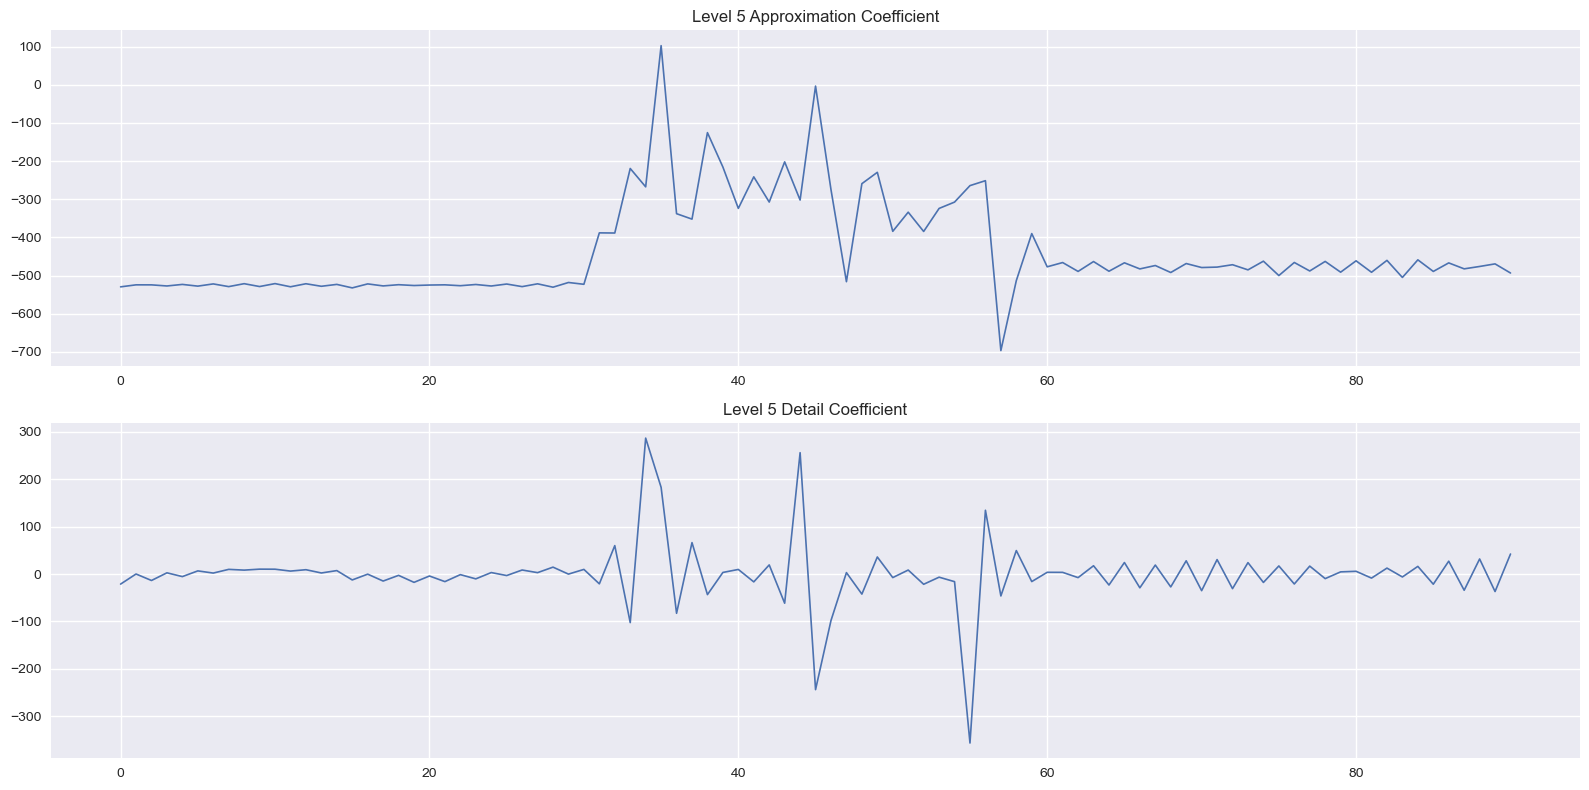

In [22]:
coeffs = pywt.wavedec(ECG_signal, w, level=5)
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
axarr[0].plot(coeffs[0], linewidth=1.2)
axarr[0].set_title('Level 5 Approximation Coefficient')
axarr[1].plot(coeffs[1], linewidth=1.2)
axarr[1].set_title('Level 5 Detail Coefficient')
plt.tight_layout()
plt.show()

What do you notice about each level of decompostion relative to the others, try plot them all together to visualise this:

In [23]:
### Try plot all the wavelet decomposition signals at each level together

There is a large collection of wavelet families, each that differs slightly in how it decomposes a signal, below we list all the wavelet families so you can see what they are, try running the above DWT with a different family.

### Wavelets - Short Name

In [24]:
print(pywt.families(short=True))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


### Wavelets - Full Name

In [25]:
print(pywt.families(short=False))


['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


###  Discrete Wavelets


In [26]:
print(pywt.wavelist(kind='discrete'))


['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


### Continuous Wavelets

In [27]:
print(pywt.wavelist(kind='continuous'))

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


This code plots a variety of discrete and continuous wavelets by plotting out their respective wavelet function plots. It iterates over predefined collections of wavelet families, loads them with pywt.Wavelet and pywt.ContinuousWavelet, and plots them in a 4x2 grid for shape comparison.

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


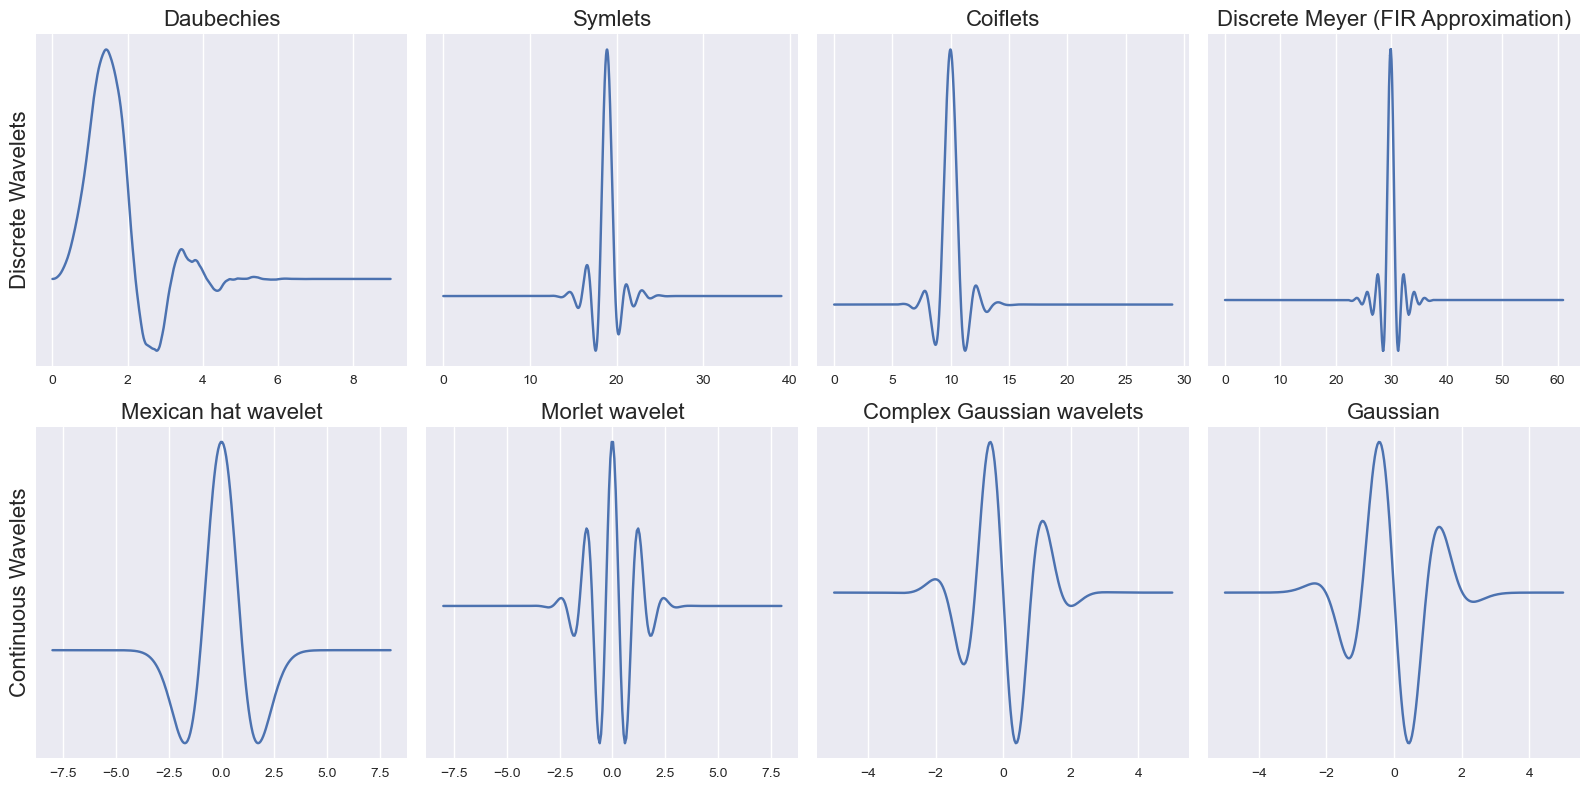

In [28]:

discrete_wavelets = ['db5', 'sym20', 'coif5', 'dmey']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

## Reconstructing a Wavelet Signal

Wavelet signal reconstruction is a process of rebuilding a signal from its decomposed wavelet coefficients. Reconstruction is achieved through Inverse Wavelet Transform (IWT), in which decomposed wavelet coefficients are combined to yield an approximation of, and even the actual, original signal. Reconstruction plays a critical role in denoising, compression, and feature extraction, in which a signal is processed in the wavelet domain and then recovered. By selectively discarding, changing, and even inverting certain wavelet coefficients, important features can be retained and noise can be eliminated, and thus, wavelet reconstruction can become a powerful tool in signal processing.

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

def get_metrics(y_true, y_pred, filename=None):

    metrics = pd.DataFrame(columns=['RMSE', 'Pearson r'])

    # Calculate MSE and then take the square root to get RMSE
    mse = mean_squared_error(y_true[:], y_pred[:y_true.shape[0]])
    rmse = round(np.sqrt(mse), 7) #Manually calculate RMSE
    pearson_r = round(pearsonr(y_true, y_pred[:y_true.shape[0]])[0],7)
    metrics = [rmse, pearson_r]

    return metrics

This code carries out wavelet decomposition and reconstruction of an ECG signal with a Symlet 2 (sym2) wavelet at five decomposition levels. It yields **approximation (low-frequency) and detail (high-frequency) coefficients at each level. It then reconstructs a signal with specific coefficients with `pywt.waverec()`, and analysis can then be conducted for specific frequency sub-bands. It then graphs the original signal, reconstructed approximations, and detail segments for each level, with performance statistics printed out.

In [30]:
# First, we reconstruct a signal using pywt.wavedec()
waveletname='sym2'
coefficients_level1 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=1)
coefficients_level2 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=2)
coefficients_level3 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=3)
coefficients_level4 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=4)
coefficients_level5 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=5)

# pywt.wavedec() returns a list of coefficients. Below, we explicitly assign this list of coefficients to variables.
[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5

# Since the list of coefficients has been explicitly assigned to variables, we can set some of them to zero.
approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]

approx_coeff_level5_only = [cA5_l5, None, None, None, None, None]
detail_coeff_level5_only = [None, cD5_l5, None, None, None, None]


# By reconstructing the signal from only a specific set of coefficients,...
# we can see how the frequency sub-band for that particular set of coefficients looks.
rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, waveletname, 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, waveletname, 'smooth')
metrics_level1=get_metrics(ECG_signal,rec_signal_cA_level1)

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, waveletname, 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, waveletname, 'smooth')
metrics_level2=get_metrics(ECG_signal,rec_signal_cA_level2)

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, waveletname, 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, waveletname, 'smooth')
metrics_level3=get_metrics(ECG_signal,rec_signal_cA_level3)

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, waveletname, 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, waveletname, 'smooth')
metrics_level4=get_metrics(ECG_signal,rec_signal_cA_level4)

rec_signal_cA_level5 = pywt.waverec(approx_coeff_level5_only, waveletname, 'smooth')
rec_signal_cD_level5 = pywt.waverec(detail_coeff_level5_only, waveletname, 'smooth')
metrics_level5=get_metrics(ECG_signal,rec_signal_cA_level5)


<Figure size 1400x700 with 0 Axes>

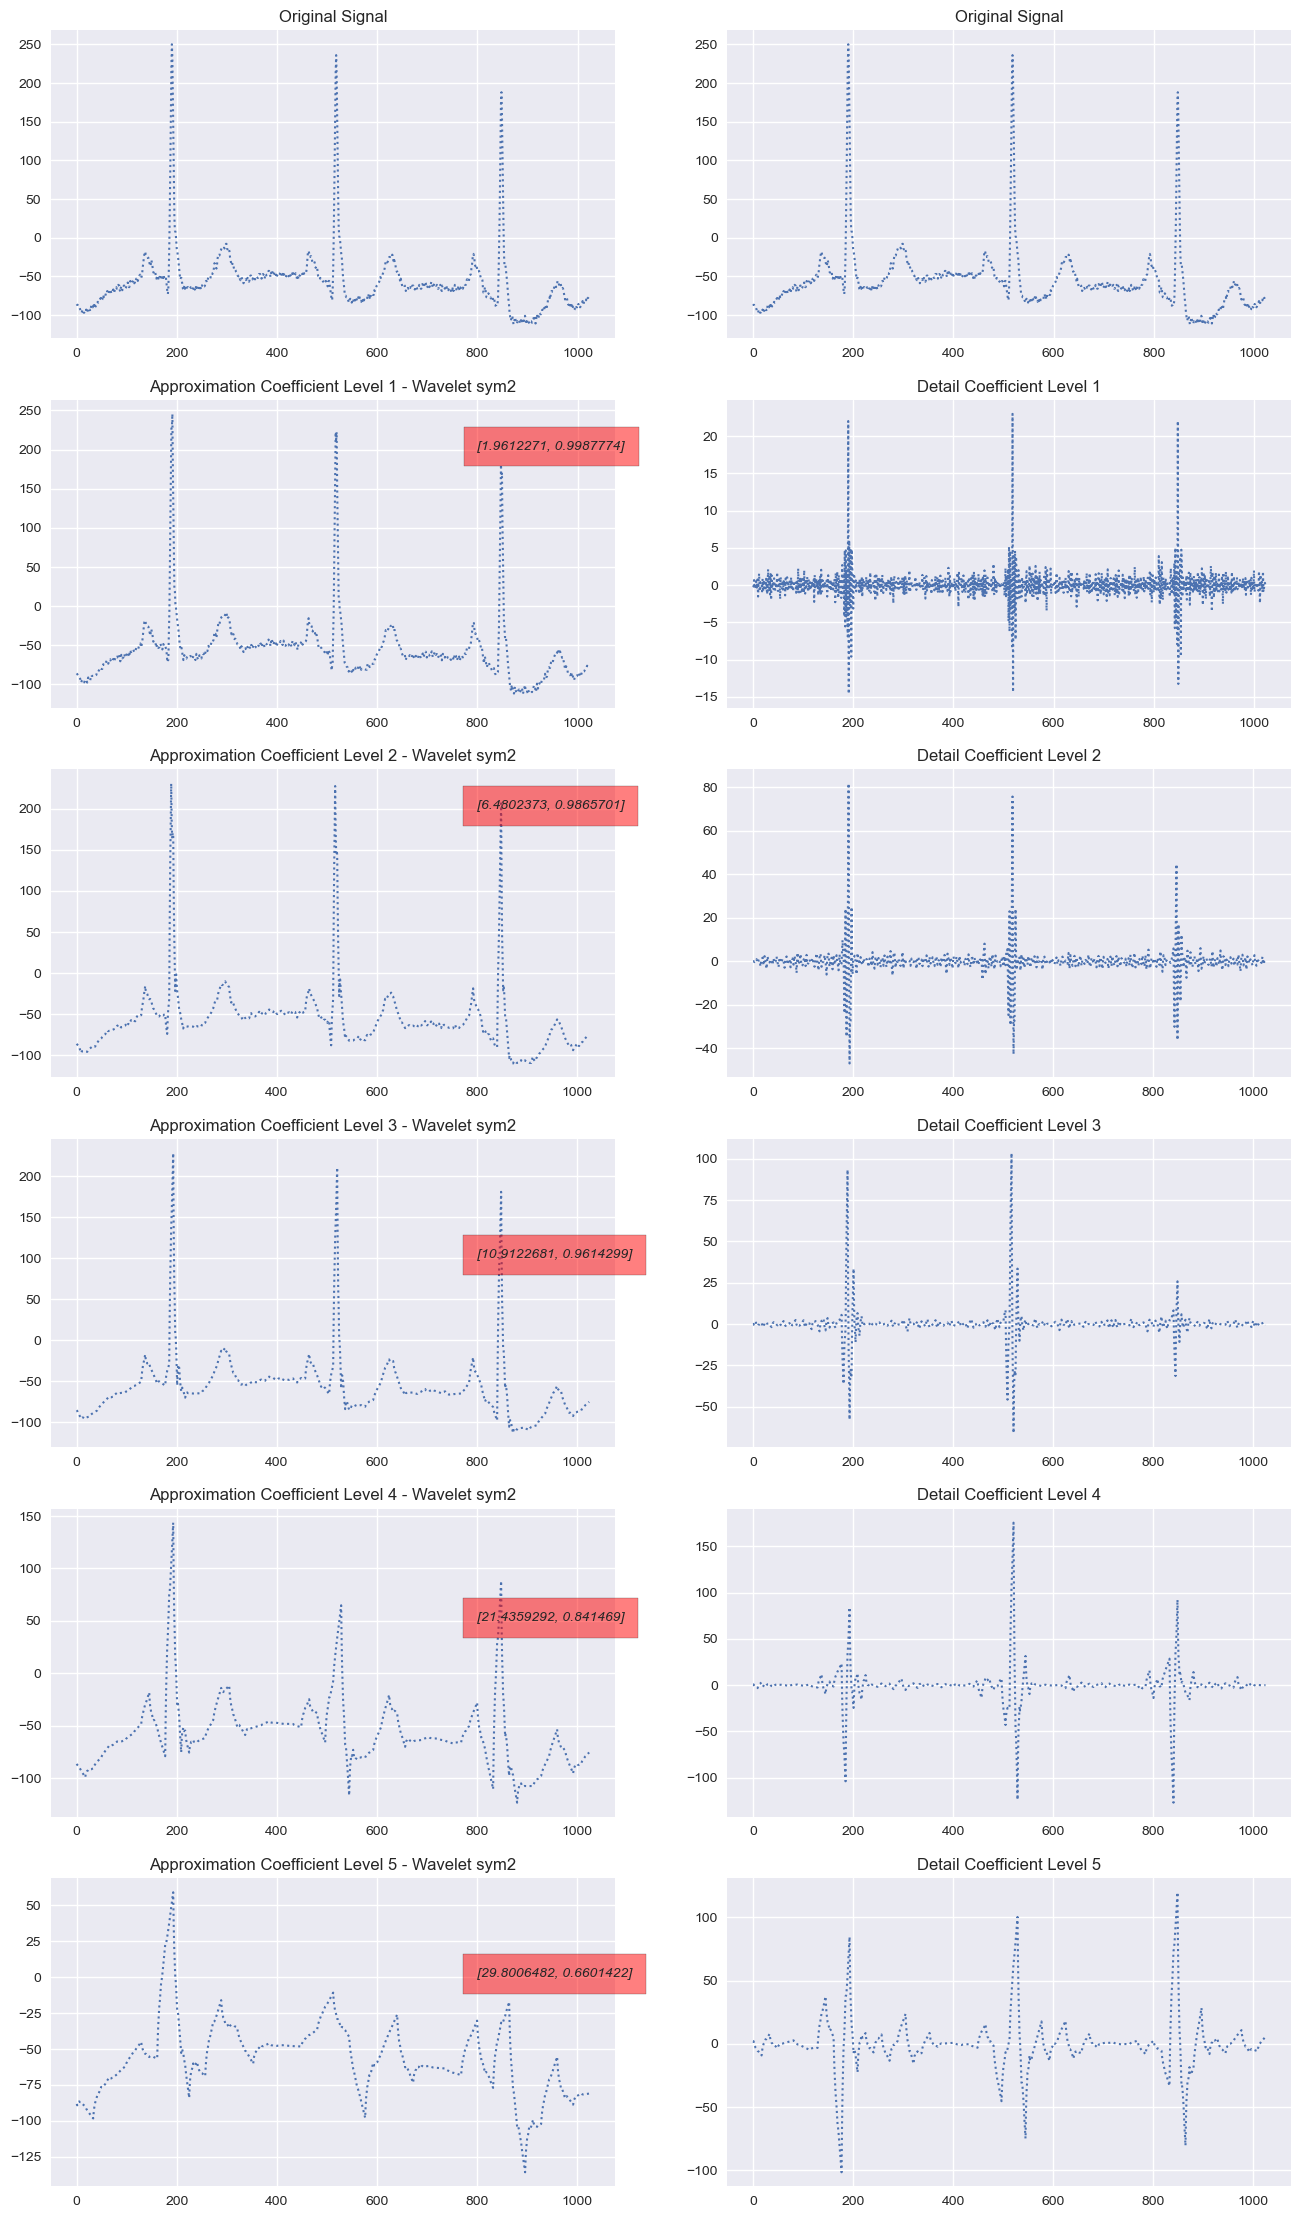

In [31]:
# Plotting the different levels of approximation and detail coefficients
plt.figure(figsize=(14, 7))
fig, axarr = plt.subplots(nrows=6, ncols=2, figsize=(16, 7*4))
axarr[0, 0].plot(ECG_signal, linewidth=1.5, linestyle=':')
axarr[0, 0].set_title('Original Signal')
axarr[1, 0].plot(rec_signal_cA_level1, linewidth=1.5, linestyle=':')
axarr[1, 0].set_title('Approximation Coefficient Level 1 - Wavelet ' + waveletname)
axarr[1, 0].text(800, 200, metrics_level1, style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axarr[2, 0].plot(rec_signal_cA_level2, linewidth=1.5, linestyle=':')
axarr[2, 0].set_title('Approximation Coefficient Level 2 - Wavelet ' + waveletname)
axarr[2, 0].text(800, 200, metrics_level2, style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axarr[3, 0].plot(rec_signal_cA_level3, linewidth=1.5, linestyle=':')
axarr[3, 0].set_title('Approximation Coefficient Level 3 - Wavelet ' + waveletname)
axarr[3, 0].text(800, 100, metrics_level3, style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axarr[4, 0].plot(rec_signal_cA_level4, linewidth=1.5, linestyle=':')
axarr[4, 0].set_title('Approximation Coefficient Level 4 - Wavelet ' + waveletname)
axarr[4, 0].text(800, 50, metrics_level4, style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axarr[5, 0].plot(rec_signal_cA_level5, linewidth=1.5, linestyle=':')
axarr[5, 0].set_title('Approximation Coefficient Level 5 - Wavelet ' + waveletname)
axarr[5, 0].text(800, 0, metrics_level5, style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

axarr[0, 1].plot(ECG_signal, linewidth=1.5, linestyle=':')
axarr[0, 1].set_title('Original Signal')
axarr[1, 1].plot(rec_signal_cD_level1, linewidth=1.5, linestyle=':')
axarr[1, 1].set_title('Detail Coefficient Level 1')
axarr[2, 1].plot(rec_signal_cD_level2, linewidth=1.5, linestyle=':')
axarr[2, 1].set_title('Detail Coefficient Level 2')
axarr[3, 1].plot(rec_signal_cD_level3, linewidth=1.5, linestyle=':')
axarr[3, 1].set_title('Detail Coefficient Level 3')
axarr[4, 1].plot(rec_signal_cD_level4, linewidth=1.5, linestyle=':')
axarr[4, 1].set_title('Detail Coefficient Level 4')
axarr[5, 1].plot(rec_signal_cD_level5, linewidth=1.5, linestyle=':')
axarr[5, 1].set_title('Detail Coefficient Level 5')
plt.show()


### Thus, a discrete wavelet is useful for extracting features from time series at different levels of frequency filtering and scale.



## Using pywt.dwt() for the decomposition of a signal into frequency sub-bands and then reconstructing it again.

This code performs a discrete wavelet transform (DWT) of an ECG signal with Symlet 5 (sym5) at five scales. It takes approximation (cA) and detail (cD) coefficients at each level, and then forms a new signal out of them with pywt.waverec(). It plots the original ECG and each level's reconstructed signals, comparing how the signal changes with added detail included.









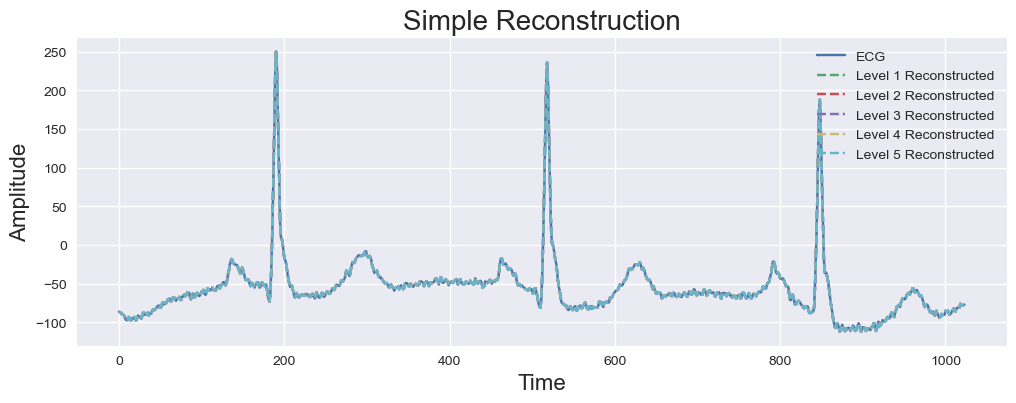

In [32]:
waveletname='sym5'

(cA1, cD1) = pywt.dwt(ECG_signal, waveletname, 'smooth')
(cA2, cD2) = pywt.dwt(cA1, waveletname, 'smooth')
(cA3, cD3) = pywt.dwt(cA2, waveletname, 'smooth')
(cA4, cD4) = pywt.dwt(cA3, waveletname, 'smooth')
(cA5, cD5) = pywt.dwt(cA4, waveletname, 'smooth')

coefficients_level1 = [cA1, cD1]
coefficients_level2 = [cA2, cD2, cD1]
coefficients_level3 = [cA3, cD3, cD2, cD1]
coefficients_level4 = [cA4, cD4, cD3, cD2, cD1]
coefficients_level5 = [cA5, cD5, cD4, cD3, cD2, cD1]

reconstructed_signal_level1 = pywt.waverec(coefficients_level1, waveletname, 'smooth')
reconstructed_signal_level2 = pywt.waverec(coefficients_level2, waveletname, 'smooth')
reconstructed_signal_level3 = pywt.waverec(coefficients_level3, waveletname, 'smooth')
reconstructed_signal_level4 = pywt.waverec(coefficients_level4, waveletname, 'smooth')
reconstructed_signal_level5 = pywt.waverec(coefficients_level5, waveletname, 'smooth')

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(ECG_signal, label='ECG')
ax.plot(reconstructed_signal_level1, label='Level 1 Reconstructed', linestyle='--')
ax.plot(reconstructed_signal_level2, label='Level 2 Reconstructed', linestyle='--')
ax.plot(reconstructed_signal_level3, label='Level 3 Reconstructed', linestyle='--')
ax.plot(reconstructed_signal_level4, label='Level 4 Reconstructed', linestyle='--')
ax.plot(reconstructed_signal_level5, label='Level 5 Reconstructed', linestyle='--')
ax.legend(loc='upper right')
ax.set_title('Simple Reconstruction', fontsize=20)
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show()



## Using pywt.wavedec() for the decomposition of a signal into frequency sub-bands and then reconstructing it again.

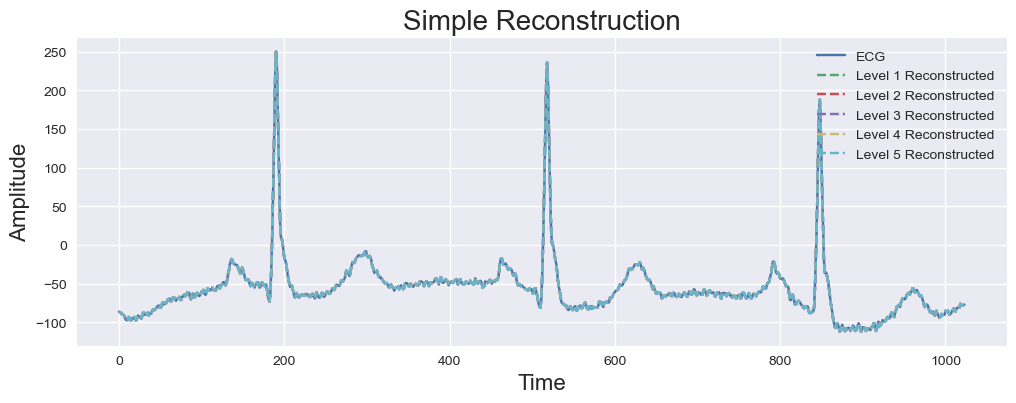

In [33]:
waveletname = 'sym5'

coefficients_level1 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=1)
coefficients_level2 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=2)
coefficients_level3 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=3)
coefficients_level4 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=4)
coefficients_level5 = pywt.wavedec(ECG_signal, waveletname, 'smooth', level=5)

reconstructed_signal_level1 = pywt.waverec(coefficients_level1, waveletname, 'smooth')
reconstructed_signal_level2 = pywt.waverec(coefficients_level2, waveletname, 'smooth')
reconstructed_signal_level3 = pywt.waverec(coefficients_level3, waveletname, 'smooth')
reconstructed_signal_level4 = pywt.waverec(coefficients_level4, waveletname, 'smooth')
reconstructed_signal_level5 = pywt.waverec(coefficients_level5, waveletname, 'smooth')

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(ECG_signal, label='ECG')
ax.plot(reconstructed_signal_level1, label='Level 1 Reconstructed', linestyle='--')
ax.plot(reconstructed_signal_level2, label='Level 2 Reconstructed', linestyle='--')
ax.plot(reconstructed_signal_level3, label='Level 3 Reconstructed', linestyle='--')
ax.plot(reconstructed_signal_level4, label='Level 4 Reconstructed', linestyle='--')
ax.plot(reconstructed_signal_level5, label='Level 5 Reconstructed', linestyle='--')
ax.legend(loc='upper right')
ax.set_title('Simple Reconstruction', fontsize=20)
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show()


## Additional Reading
- SPERANDIO NASCIMENTO, ERICK GIOVANI; ORTIZ, JÚNIA; FURTADO, ADHVAN NOVAIS; FRIAS, DIEGO. Using discrete wavelet transform for optimizing COVID-19 new cases and deaths prediction worldwide with deep neural networks. PLoS One, v. 18, p. e0282621, 2023. DOI: http://dx.doi.org/10.1371/journal.pone.0282621

- Nascimento, Erick Giovani Sperandio; DE MELO, TALISON A.C.; MOREIRA, DAVIDSON M. A transformer-based deep neural network with wavelet transform for forecasting wind speed and wind energy. ENERGY, v. 278, p. 127678, 2023. DOI: http://dx.doi.org/10.1016/j.energy.2023.127678

- GALVÃO, STEPHANIE LIMA JORGE; MATOS, JÚNIA CRISTINA ORTIZ; KITAGAWA, YASMIN KAORE LAGO; CONTERATO, FLÁVIO SANTOS; MOREIRA, DAVIDSON MARTINS; KUMAR, PRASHANT; Nascimento, Erick Giovani Sperandio. Particulate Matter Forecasting Using Different Deep Neural Network Topologies and Wavelets for Feature Augmentation. Atmosphere, v. 13, p. 1451, 2022. DOI: http://dx.doi.org/10.3390/atmos13091451

- SOUZA, R. M. ; NASCIMENTO, ERICK GIOVANI SPERANDIO ; Silva, W. J. D. ; MIRANDA, U. A. ; LEPIKSON, H. A. . Deep learning for diagnosis and classification of faults in industrial rotating machinery. COMPUTERS & INDUSTRIAL ENGINEERING, v. 153, p. 107060, 2021.

- ZUCATELLI, P. J.; NASCIMENTO, E.G.S.; SANTOS, A. A. B.; MOREIRA, D.M. Nowcasting prediction of wind speed using Computational Intelligence and Wavelet in Brazil. INTERNATIONAL JOURNAL FOR COMPUTATIONAL METHODS IN ENGINEERING SCIENCE AND MECHANICS, 2020. DOI: http://dx.doi.org/10.1080/15502287.2020.1841335

- A Guide for Using the Wavelet Transform in Machine Learning: - http://ataspinar.com/posts/a-guide-for-using-the-wavelet-transform-in-machine-learning/
